# EX1

In [ ]:
import numpy as np
import soundfile as sf

def x(t):
    return 1*np.sin(2*np.pi*250*t)+0.6*np.sin(2*np.pi*500*t)+0.3*np.sin(2*np.pi*1000*t)

Fe=48000
Duree=4
# num of echantillons
N = Fe*Duree
print(f"Number of samples N : {N}")
print(f"Periods T1 :{(1/250):.6f} s, T2 :{1/500:.6f} s, T3 :{1/1000:.6f} s")
# all periods
t = np.arange(0, Duree, 1/Fe)
signal = x(t)
sf.write('signal_x.wav', signal, Fe)

Number of samples N : 192000
Periods T1 :0.004000 s, T2 :0.002000 s, T3 :0.001000 s


# EX2

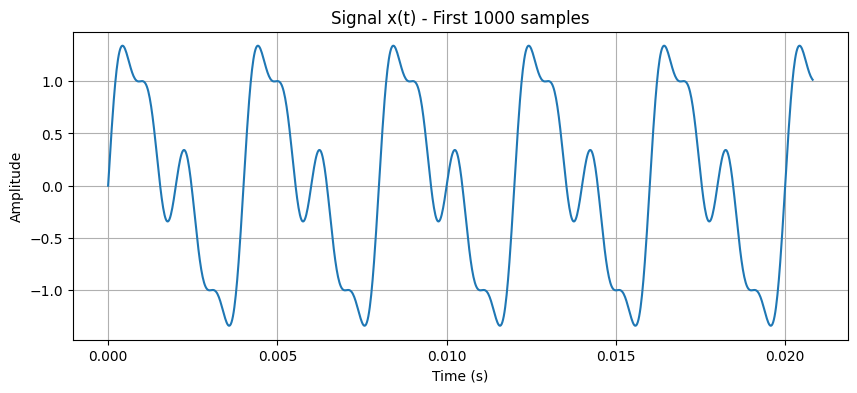

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(t[:1000], signal[:1000])
plt.title("Signal x(t) - First 1000 samples")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

X_mask = (t >= 0.015) & (t <= 0.025)



# EX 3

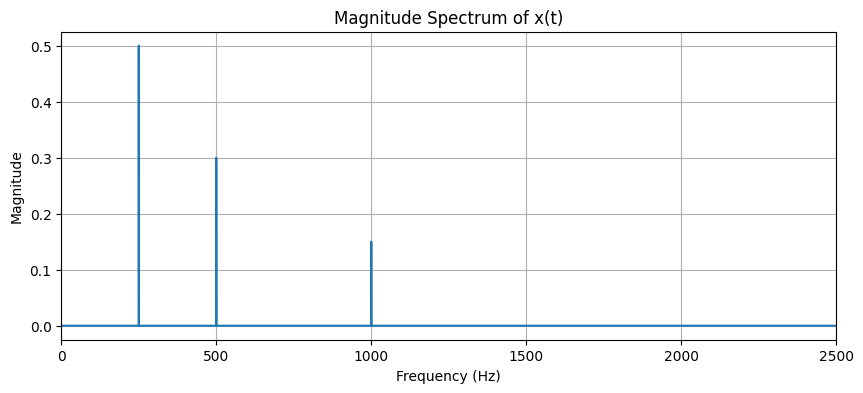

In [19]:
from numpy.fft import fft, fftfreq
X_f = fft(signal)
frequencies = fftfreq(N, 1/Fe)
magnitude = np.abs(X_f) / N
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], magnitude[:N//2])
plt.title("Magnitude Spectrum of x(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 2500)
plt.show()

# EX 4

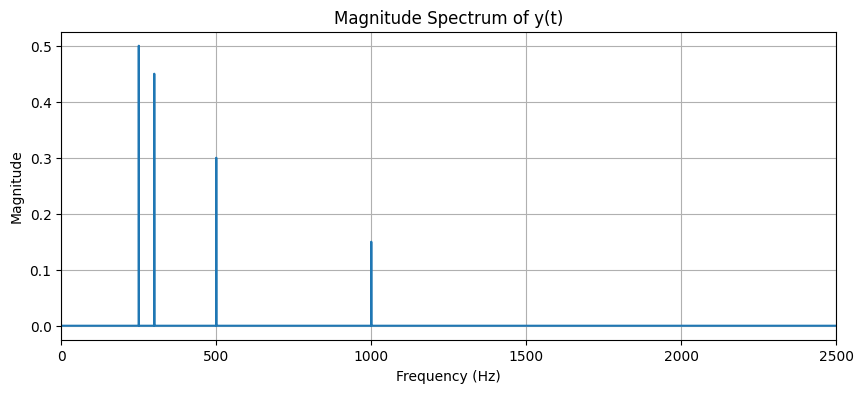

In [ ]:
def y(t):
    return x(t) + 0.9*np.sin(2*np.pi*300*t+(np.pi/3))

signal_y = y(t)
Y_f = fft(signal_y)
magnitude_y = np.abs(Y_f) / N
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], magnitude_y[:N//2])
plt.title("Magnitude Spectrum of y(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 2500)
plt.show()
sf.write('signal_y.wav', signal_y, Fe)

info,fs= sf.read('signal_y.wav')
information={
    "Name of the File": 'signal_y.wav',
    "Data Type": info.dtype,
    "Number of Channels": info.shape[1] if info.ndim > 1 else 1,
    "Nombre d'échantillons": info.shape[0],
    "number"
    "Fréquence d'échantillonnage": fs,
    "Length": len(info),
    "Duration (s)": len(info) / fs,
}
for key, value in information.items():
    print(f"{key}: {value}")


